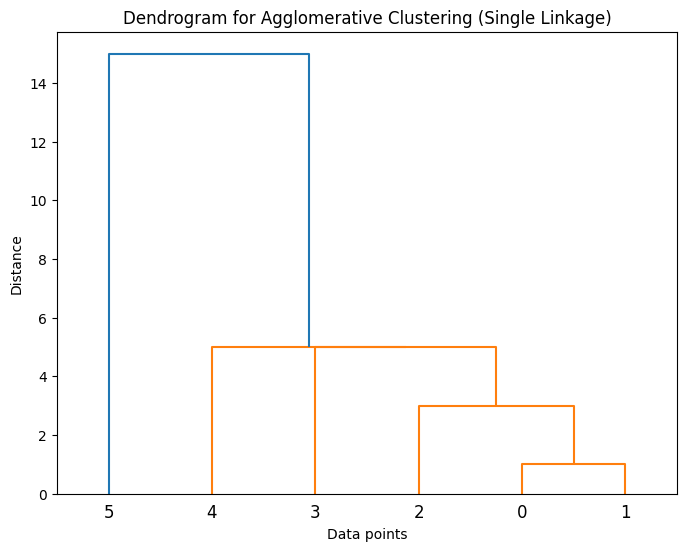

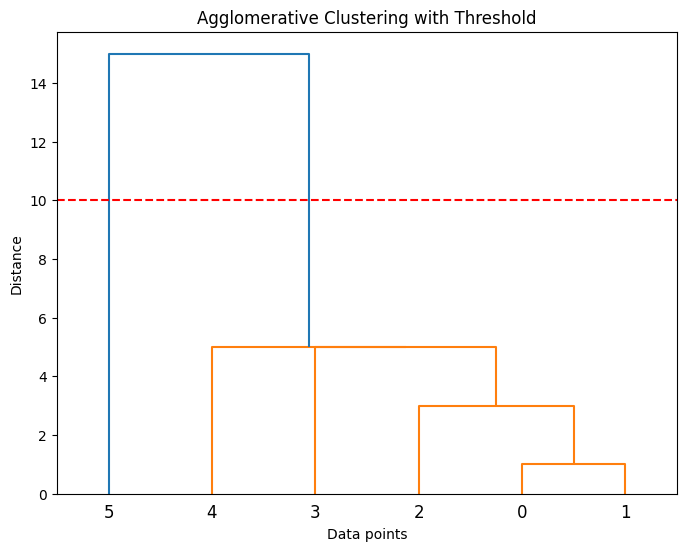

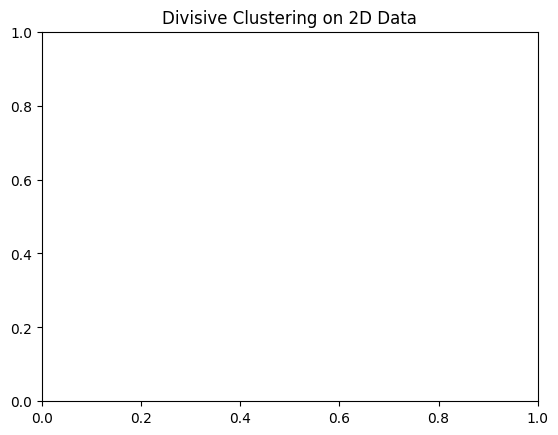

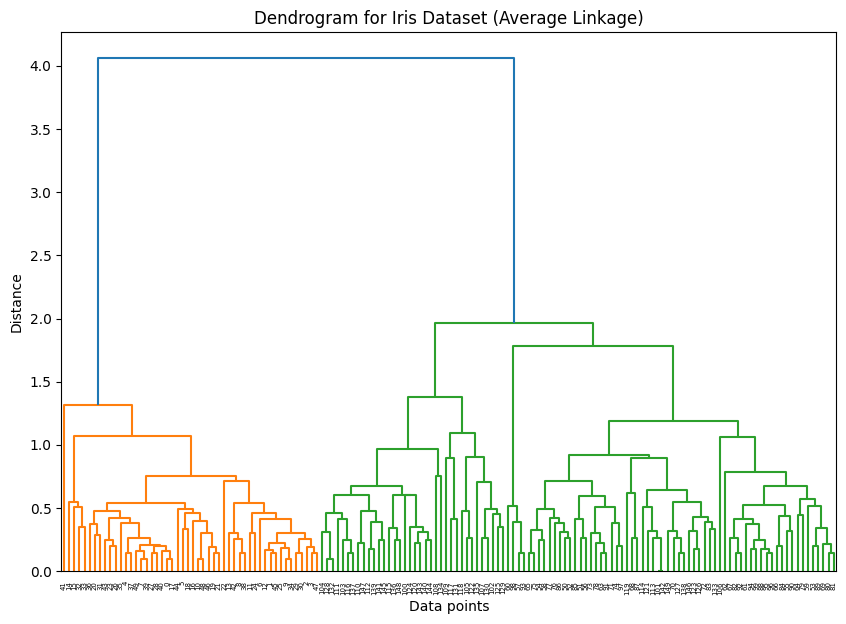

In [1]:

# Dendrograms for Cluster Visualization

# Task 1: Visualizing Agglomerative Clustering

# 1. Use the same numerical dataset: [1, 2, 5, 10, 15, 30] .
# 2. Generate a dendrogram using the linkage method of your choice (e.g., single, complete, average).
# 3. Identify the optimal number of clusters by selecting a threshold.

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Task 1 Dataset
data_1d = np.array([1, 2, 5, 10, 15, 30]).reshape(-1, 1)  # Reshaped for hierarchical clustering

# Perform Agglomerative Clustering (using 'single' linkage as an example)
linked = linkage(data_1d, method='single')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering (Single Linkage)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

# Identify optimal number of clusters (using a threshold for cutting the dendrogram)
# Choose a threshold for cutting the dendrogram. For instance, cut the dendrogram at distance 10.
plt.figure(figsize=(8, 6))
dendrogram(linked)
plt.axhline(y=10, color='r', linestyle='--')  # Threshold line
plt.title("Agglomerative Clustering with Threshold")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()



# Task 2: Visualizing Divisive Clustering

# 1. Employ a simple dataset: [(1, 2), (3, 4), (5, 5), (8, 9), (12, 15)] .
# 2. Construct a dendrogram based on divisive clustering.
# 3. Discuss how the dendrogram and cluster divisions align.

from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Task 2 Dataset (2D points)
data_2d = np.array([(1, 2), (3, 4), (5, 5), (8, 9), (12, 15)])

# Custom divisive clustering method (approximation)
def divisive_clustering(data):
    clusters = [data]
    steps = []

    while len(clusters) < len(data):  # Continue until each point is its own cluster
        max_distance = 0
        pair_to_split = (None, None)
        
        # Find the two most distant clusters
        for i, c1 in enumerate(clusters):
            for j, c2 in enumerate(clusters):
                if i >= j:
                    continue
                dist = np.mean(cdist(c1, c2))
                if dist > max_distance:
                    max_distance = dist
                    pair_to_split = (i, j)

        if pair_to_split == (None, None):
            break  # No valid pair found, break out of the loop

        # Split the pair
        i, j = pair_to_split
        merged_cluster = clusters[i] + clusters[j]  # Merge the clusters
        clusters[i] = merged_cluster[:len(merged_cluster)//2]  # Split into two
        clusters.append(merged_cluster[len(merged_cluster)//2:])
        
        steps.append([np.array(c) for c in clusters])  # Record clusters at each step
    
    return steps

# Apply divisive clustering
steps_2d = divisive_clustering(data_2d)

# Visualize the clustering steps
for step in steps_2d:
    plt.scatter(step[:, 0], step[:, 1])
plt.title("Divisive Clustering on 2D Data")
plt.show()


# Task 3: Dendrogram Interpretation on a Real Dataset

# 1. Load the Iris dataset.
# 2. Perform Agglomerative Clustering and create a dendrogram.
# 3. Discuss how the dendrogram can help in understanding the natural grouping of data points in the dataset.

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Task 3: Load Iris dataset
iris = load_iris()
data_iris = iris.data  # Use features, not the target labels

# Perform Agglomerative Clustering (using 'average' linkage as an example)
linked_iris = linkage(data_iris, method='average')

# Plot the dendrogram for the Iris dataset
plt.figure(figsize=(10, 7))
dendrogram(linked_iris)
plt.title("Dendrogram for Iris Dataset (Average Linkage)")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

# Discussion: 
# By visualizing the dendrogram, we can observe how the data points group together based on their similarity.
# A natural cut can be made to identify clusters, and the dendrogram helps us understand the hierarchical structure 
# and relationships between different samples.
